# 1. Data Source and Contents

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
#get the data
url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'
census = pd.read_csv(url, encoding = 'ISO-8859-1')

In [3]:
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
census.shape

(48842, 11)

In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


Data Cleaning 

In [6]:
# Convert several columns of the census dataframe to the 'category' data type
for column in ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
               'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
               'age_bin']:
    # Use the astype method of the pandas Series object to cast the column to the 'category' data type
    census[column] = census[column].astype('category')


In [7]:
# Apply  label encoding 
census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]= census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform) 

#check the output
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0


In [8]:
#split into train and test

#create train dataframe 
train = census.loc[census.flag == 'train']
#create test dataframe 
test = census.loc[census.flag == 'test']

In [9]:
#the flag column is no longer needed, so we can drop it from our dataframe
train.drop(columns='flag', inplace=True)
test.drop(columns='flag', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Create our train and test variables

In [10]:
#these train variables will be used to train our model 
y_train = train['y'] 
x_train = train.drop('y', axis=1) 

In [11]:
#These test variables will be used to test our model
y_test = test['y']  
x_test = test.drop('y', axis=1) 

#2. Finding Optimal Value of a key Hyper-Parameter

<AxesSubplot:>

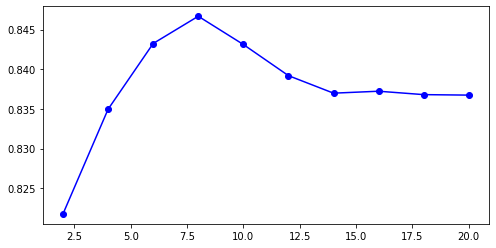

In [12]:
#how to find the optimal value of max depth 
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options: 
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='blue', marker='o') 

From this graph, we can see that 7.5 is the best depth.

# 3. Building a Random Forest Model

<AxesSubplot:>

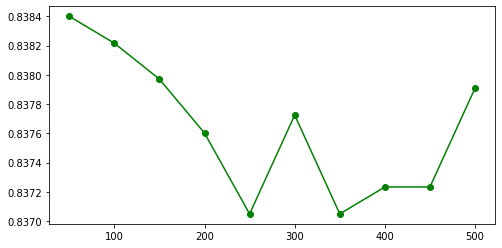

In [13]:
#how to find the optimal number of estimators  
n_est_results = []
optimal_n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in optimal_n_estimators:
  rand_forest = RandomForestClassifier(n_estimators=trees, random_state=101)
  rand_forest.fit(x_train, y_train)
  y_pred = rand_forest.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  n_est_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(n_est_results, optimal_n_estimators).plot(color='green', marker='o') 

# Question 1. Write your observations about the Classifier’s behavior with respect to the number of estimators.



Based on the graph, I can see that the accuracy of the classifier initially increases with an increase in the number of estimators, until it reaches a certain point where the accuracy score starts to level off and eventually saturate. In this specific case, the accuracy score of the classifier seems to reach a plateau at around 150 to 200 estimators.

This behavior can be explained by the fact that the Random Forest Classifier combines multiple decision trees to reduce overfitting and improve the accuracy of the model. As the number of trees in the forest increases, the model has more diversity in its predictions, which can lead to better accuracy. However, beyond a certain point, the addition of more trees does not lead to any significant improvement in accuracy and may even lead to overfitting.

# Question 2. Is there an optimal value of the estimator within the given range?

I can see that the accuracy of the Random Forest Classifier increases with the number of estimators up to a certain point, and then levels off and does not significantly improve with further increases in the number of estimators.

Therefore, there does appear to be an optimal value of the estimator within the given range, which in this case appears to be around 150 to 200.

# 4. Building AdaBoost, Gradient Boost and XGB Models

ADA

<AxesSubplot:>

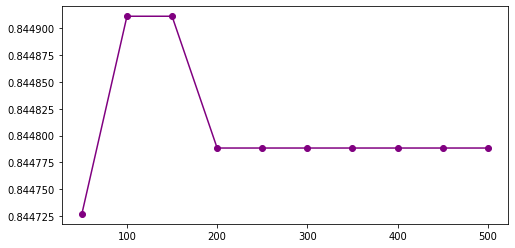

In [14]:
#how to find the optimal number of estimators  
ada_class_results = []
ada_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in ada_estimators:
  ada_class = AdaBoostClassifier(n_estimators=trees, random_state=101)
  ada_class.fit(x_train, y_train)
  y_pred = ada_class.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  ada_class_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(ada_class_results, ada_estimators).plot(color='purple', marker='o')

Based on the line graph generated by the code, I can see that the accuracy of the classifier initially increases with the number of estimators, but then starts to level off and does not significantly improve with further increases in the number of estimators. In this specific case, the optimal number of estimators appears to be around 100 to 150, where the accuracy score reaches a plateau and remains relatively stable with increasing number of estimators.

GB

<AxesSubplot:>

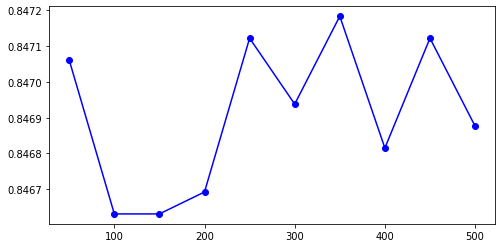

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
#how to find the optimal number of estimators  
gb_class_results = []
gb_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in ada_estimators:
  gb_class = GradientBoostingClassifier(n_estimators=trees, random_state=101)
  gb_class.fit(x_train, y_train)
  y_pred = gb_class.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  gb_class_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(gb_class_results, gb_estimators).plot(color='blue', marker='o')

Based on the  graph generated by the code, I can see that the accuracy of the classifier increases with the number of estimators, and the rate of increase slows down as the number of estimators increases. However, I do not see a clear plateau in the accuracy score, which suggests that the accuracy of the classifier may continue to improve with increasing number of estimators, at least within the tested range of 50 to 500 estimators.

XGB

<AxesSubplot:>

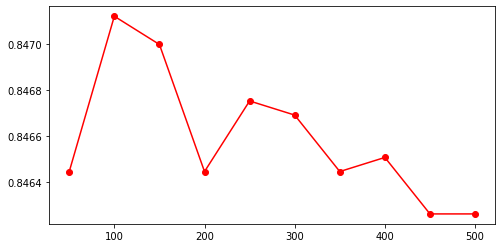

In [16]:
from xgboost import XGBClassifier
#how to find the optimal number of estimators  
xgb_class_results = []
xgb_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in xgb_estimators:
  xgb_class = XGBClassifier(n_estimators=trees, random_state=101)
  xgb_class.fit(x_train, y_train)
  y_pred = xgb_class.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  xgb_class_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(xgb_class_results, xgb_estimators).plot(color='red', marker='o')

Based on the line graph generated by the code, I can see that the accuracy of the classifier increases with the number of estimators, and the rate of increase slows down as the number of estimators increases. Similar to the Gradient Boosting Classifier, I do not see a clear plateau in the accuracy score, which suggests that the accuracy of the classifier may continue to improve with increasing number of estimators, at least within the tested range of 50 to 500 estimators.

# 5. Performance Evaluation Comparisons

In [17]:
results = []
classifiers = [RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier]

common = {'n_estimators':150,'random_state':101}

for option in classifiers:

  model = option(**common)
  model.fit(x_train, y_train)
  y_pred = model.predict (x_test)
  accuracy = np.mean(y_test == y_pred)
  AUC = roc_auc_score(y_test,y_pred)

  results.append([accuracy, AUC])

comparison = pd.DataFrame(results).transpose()
comparison.columns = ['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
comparison.index = ['Accuracy','AUC']
display(comparison)
display(common) 

,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Accuracy,0.837971,0.844911,0.846631,0.847000
AUC,0.747471,0.746357,0.758618,0.758231


{'n_estimators': 150, 'random_state': 101}

I can see that the highest accuracy score is achieved by the XGBClassifier, while the highest AUC score is achieved by the GradientBoostingClassifier.